<a href="https://colab.research.google.com/github/THESHAMIK/Real-Life-Projects/blob/main/Deep_NN/KHDS_Scaling_Normalization_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/

4 methods r tried basically to check MSE:
==> No scaling of inputs, no scaling of outputs.
==> No scaling of inputs, standardized outputs.
==> Normalized inputs, standardized outputs.
==> Standardized inputs, standardized outputs.

With NO SCALING MSE was ::
Train: 11871.008, Test: 17262.006 (This was actually coming as NAN when SGD was used. Even changing learning rate did not help. Then used ADAM to get rid of nan).

After scaling of target (ONLY) y values Train: 4310.841, Test: 6117.738.
So MSE came to 1/3rd.

Now lets scale X also. So both X & y scaled now. Look at score wow!!
**Train: 0.790, Test: 7.451**
MSE moved from 11.8k to 4k to just 0.79!! 

4TH attempt failed miserably where y is scaled (with StandardScaler) BUT X is normalized(with MinMaxScaler - from sklearn.preprocessing import MinMaxScaler)!!
Train: 1630137856.000, Test: 2735642112.000



In [ ]:
# Import packages
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
#from keras.optimizers import SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.optimizers import SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.optimizers import Adam ##because cannot import name 'Adam' from 'keras.optimizers'
from keras.callbacks import EarlyStopping, ModelCheckpoint
#from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
#from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [ ]:
  df = pd.read_csv("khds_final_1.csv")
  df['Product Sulphur'] = pd.to_numeric(df['Product Sulphur'],errors = 'coerce') ##==> This one works as pd.to_numeric works for convert a list, a series, an array, or a tuple to a numeric datatype
  filtered_df = df[df['Product Sulphur'].notnull()]
  df.dropna(axis=0)
  filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711 entries, 0 to 710
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   LABfeed Sulphur                            711 non-null    float64
 1   T1 : FRESH FEED FLOW TO KHDS KGPerHour     711 non-null    float64
 2   T1 : Reactor inlet temperature DEGC        711 non-null    float64
 3   T1 : Hydrogen make-up flow NM3perHour      711 non-null    float64
 4   T1 : Recycle hydrogen flow NM3perHour      711 non-null    float64
 5   T1 : REACTOR OUTLET Temp DEGC              711 non-null    float64
 6   T1 : REACTOR FEED INLET Pressure KGperCM2  711 non-null    float64
 7   T1 : Cold separator pressure KGperCM2      711 non-null    float64
 8   T1 : KERO FEED DENSITY KGperCM2            711 non-null    float64
 9   T2 : FRESH FEED FLOW TO KHDS KGPerHour     711 non-null    float64
 10  T2 : Reactor inlet tempera

In [ ]:
target_col = "Product Sulphur"
X = filtered_df.loc[:, filtered_df.columns != target_col]
y = filtered_df.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=2021)

In [ ]:
print("XTRAIN :: ytrain shapes::"+ str(X_train.shape + y_train.shape))

XTRAIN :: ytrain shapes::(568, 33, 568)


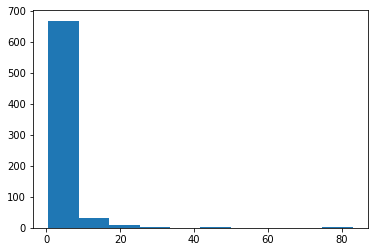

In [ ]:
from matplotlib import pyplot
pyplot.hist(y)
pyplot.show()

In [ ]:
# split into train and test ==> Not using train_test_split which is vertical split. Instead going for HORIZONTAL split
n_train = 568
trainX, testX = X.iloc[:n_train, :], X.iloc[n_train:, :]
#trainX = X.iloc[:n_train, :]
trainy, testy = y.iloc[:n_train], y.iloc[n_train:]

In [ ]:
len(trainX)

568

In [ ]:
len(testX)

143

In [ ]:
len(trainy)

568

In [ ]:
type(testy)

pandas.core.series.Series

In [ ]:
testy = testy.to_numpy()

In [ ]:
type(testy)

numpy.ndarray

In [ ]:
len(testy)

143

In [ ]:
testy = testy.reshape(-1,1)

In [ ]:
len(testy)

143

In [ ]:
len(testy)

143

In [ ]:
type(trainy)

pandas.core.series.Series

In [ ]:
trainy = trainy.to_numpy()

In [ ]:
type(trainy)

numpy.ndarray

In [ ]:
trainy = trainy.reshape(-1,1)

In [ ]:
trainy = trainy.to_numpy()
trainy = trainy.reshape(-1,1)

In [ ]:
len(trainy)

568

In [ ]:
trainX.info

<bound method DataFrame.info of      LABfeed Sulphur  T1 : FRESH FEED FLOW TO KHDS KGPerHour  \
0             1000.0                             72482.43948   
1             1400.0                             75588.69117   
2             1300.0                             75675.29792   
3             1500.0                             46269.02109   
4             1400.0                             45394.43555   
..               ...                                     ...   
563           2000.0                             91905.65938   
564           1600.0                             91530.30352   
565           1700.0                             91737.18555   
566           1600.0                             92207.36333   
567           1600.0                             91894.50188   

     T1 : Reactor inlet temperature DEGC  \
0                             288.485914   
1                             286.406314   
2                             284.035734   
3                      

In [ ]:

from tensorflow.keras.optimizers import Adam# define model
from keras.optimizer_v2.adam import Adam
model = Sequential()
model.add(Dense(64, input_dim=33, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
# compile model
#model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.00001, momentum=0.9))
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

In [ ]:
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 11871.008, Test: 17262.006


Running the example fits the model and calculates the mean squared error on the train and test sets.

https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/

In this case, the model is unable to learn the problem, resulting in predictions of NaN values. The model weights exploded during training given the very large errors and, in turn, error gradients calculated for weight updates.

This demonstrates that, at the very least, some data scaling is required for the target variable.

A line plot of training history is created but does not show anything as the model almost immediately results in a NaN mean squared error.

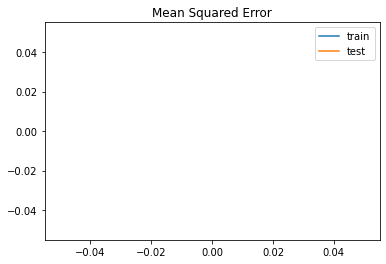

In [ ]:
from matplotlib import pyplot
# plot loss during training
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# demonstrate data standardization with sklearn
from sklearn.preprocessing import StandardScaler
import numpy as np
type(trainy)
trainy.shape[0]

568

In [ ]:
#You can see the number of dimensions for a pandas data structure with the ndim attribute.
trainy.ndim

1

In [ ]:
testy.size

143

In [ ]:
trainy.shape

(568,)

In [ ]:
trainy.size

568

In [ ]:
type(testy)

pandas.core.series.Series

In [ ]:
type(trainy)

numpy.ndarray

In [ ]:
testy = testy.to_numpy()

In [ ]:
type(testy)

numpy.ndarray

In [ ]:
trainy[:0]

array([], shape=(0, 1), dtype=float64)

In [ ]:
testy[0]

array([9.])

In [ ]:
#The scikit-learn transformers expect input data to be matrices of rows and columns, therefore the 1D arrays for the target variable will have to be reshaped into 2D arrays prior to the transforms.
# reshape 1d arrays to 2d arrays ==> ar.reshape(-1, 1) OR ar.reshape(ar.shape[0],-1)
#trainy = trainy.np.reshape(len(trainy), 1)
#trainy = trainy.reshape(trainy.shape[0],-1)
#trainy = trainy[0].reshape(-1,1)
#testy = testy.np.reshape(len(trainy), 1)
#testy = testy[0].reshape(1,-1) ##Do this step after converting testy which is a  series to numpy.ndarray. To do this use testy.to_numpy() to convert into a numy array first

In [ ]:
trainy = trainy.reshape(-1,1)

In [ ]:
trainy

array([[0.]])

In [ ]:

# created scaler
scaler = StandardScaler()
# fit scaler on training dataset
scaler.fit(trainy)
# transform training dataset
trainy = scaler.transform(trainy)
# transform test dataset
testy = scaler.transform(testy)

In [ ]:
testy.shape

(143, 1)

In [ ]:
trainy.shape

(568, 1)

In [ ]:
trainy

array([[-0.62028486],
       [-1.1344231 ],
       [-0.27752603],
       [ 0.0652328 ],
       [-0.27752603],
       [-0.27752603],
       [-0.62028486],
       [-0.62028486],
       [-0.62028486],
       [-0.27752603],
       [-0.27752603],
       [-0.62028486],
       [-0.62028486],
       [-0.96304369],
       [-0.27752603],
       [ 0.75075046],
       [-0.62028486],
       [-0.27752603],
       [-0.27752603],
       [-0.96304369],
       [-0.27752603],
       [-0.96304369],
       [-1.1344231 ],
       [-0.96304369],
       [-0.96304369],
       [-0.96304369],
       [ 1.95040636],
       [-0.10614662],
       [-0.27752603],
       [-0.27752603],
       [-0.27752603],
       [ 0.40799163],
       [ 0.0652328 ],
       [ 1.77902694],
       [ 0.40799163],
       [ 1.77902694],
       [-0.27752603],
       [-0.27752603],
       [ 0.0652328 ],
       [-0.27752603],
       [-1.1344231 ],
       [-0.62028486],
       [-0.27752603],
       [-0.96304369],
       [-0.62028486],
       [-0

In [ ]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 4310.841, Test: 6117.738


In [ ]:
scores = model.evaluate(trainX, trainy, verbose=0)
scores

4310.84130859375

In [ ]:
print(model.metrics_names)

['loss']


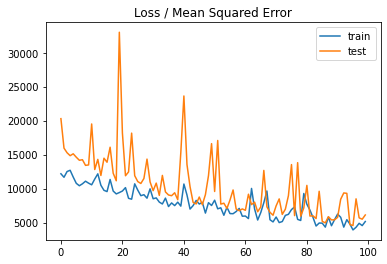

In [ ]:
# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

So first no scaling done at all. Then we scaled only target thats y.
Now lets scale Predictors thats X also. So now both X and y is scaled.

In [ ]:
# created scaler for only X predictors
input_scaler = StandardScaler()
# fit scaler on training dataset
# fit scaler
input_scaler.fit(trainX)
# transform training dataset
trainX = input_scaler.transform(trainX)
# transform test dataset
testX = input_scaler.transform(testX)

In [ ]:
# fit model
history_scaled_ip_op = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.790, Test: 7.451


In [ ]:
trainX.view()

array([[-1.82440656,  0.58437134,  0.19860015, ...,  0.31775113,
         0.15023232, -4.22005476],
       [-0.90892455,  0.72039435,  0.13503184, ...,  0.37045466,
         0.18941687, -4.22005476],
       [-1.13779505,  0.72418687,  0.06256897, ...,  0.3352423 ,
         0.16857972, -4.22005476],
       ...,
       [-0.22231304,  1.42753823,  0.42466614, ...,  0.7478497 ,
         0.11216259, -4.22005476],
       [-0.45118354,  1.44812736,  0.42684557, ...,  0.71444178,
         0.10719051, -4.22005476],
       [-0.45118354,  1.43442713,  0.39370575, ...,  0.71854973,
         0.12139079, -4.22005476]])

In [ ]:
input_scaler.inverse_transform(trainX)

array([[1.00000000e+03, 7.24824395e+04, 2.88485914e+02, ...,
        2.18053884e+01, 1.86667582e+01, 0.00000000e+00],
       [1.40000000e+03, 7.55886912e+04, 2.86406314e+02, ...,
        2.19346716e+01, 1.87472076e+01, 0.00000000e+00],
       [1.30000000e+03, 7.56752979e+04, 2.84035734e+02, ...,
        2.18482947e+01, 1.87044271e+01, 0.00000000e+00],
       ...,
       [1.70000000e+03, 9.17371855e+04, 2.95881531e+02, ...,
        2.28604321e+01, 1.85885976e+01, 0.00000000e+00],
       [1.60000000e+03, 9.22073633e+04, 2.95952830e+02, ...,
        2.27784815e+01, 1.85783895e+01, 0.00000000e+00],
       [1.60000000e+03, 9.18945019e+04, 2.94868680e+02, ...,
        2.27885584e+01, 1.86075440e+01, 0.00000000e+00]])

In [ ]:
testX.view()

array([[ 1.15090998,  1.43619098,  0.36547055, ...,  0.69458799,
         0.11612886, -4.22005476],
       [-0.22231304,  1.44892871,  0.3871206 , ...,  0.73733087,
         0.13901975, -4.22005476],
       [ 0.92203947,  1.43561116,  0.3786829 , ...,  0.64187577,
         0.10892467, -4.22005476],
       ...,
       [-1.36666555,  0.0563918 , -0.36454385, ...,  0.00603575,
         0.12344205,  0.16443284],
       [-1.13779505,  0.25108123, -0.36249281, ...,  0.0807327 ,
         0.11915125,  0.19741943],
       [-1.36666555,  0.72445903, -0.36462077, ...,  0.42562053,
         0.11313372,  0.27184167]])

In [ ]:
testX_reversed = input_scaler.inverse_transform(testX)

In [ ]:
testX.view()

array([[ 1.15090998,  1.43619098,  0.36547055, ...,  0.69458799,
         0.11612886, -4.22005476],
       [-0.22231304,  1.44892871,  0.3871206 , ...,  0.73733087,
         0.13901975, -4.22005476],
       [ 0.92203947,  1.43561116,  0.3786829 , ...,  0.64187577,
         0.10892467, -4.22005476],
       ...,
       [-1.36666555,  0.0563918 , -0.36454385, ...,  0.00603575,
         0.12344205,  0.16443284],
       [-1.13779505,  0.25108123, -0.36249281, ...,  0.0807327 ,
         0.11915125,  0.19741943],
       [-1.36666555,  0.72445903, -0.36462077, ...,  0.42562053,
         0.11313372,  0.27184167]])

In [ ]:
testX_reversed.view()

array([[2.30000000e+03, 9.19347816e+04, 2.93944982e+02, ...,
        2.27297796e+01, 1.85967407e+01, 0.00000000e+00],
       [1.70000000e+03, 9.22256631e+04, 2.94653251e+02, ...,
        2.28346291e+01, 1.86437378e+01, 0.00000000e+00],
       [2.20000000e+03, 9.19215408e+04, 2.94377216e+02, ...,
        2.26004751e+01, 1.85819499e+01, 0.00000000e+00],
       ...,
       [1.20000000e+03, 6.04253819e+04, 2.70062989e+02, ...,
        2.10407419e+01, 1.86117554e+01, 6.93730737e+02],
       [1.30000000e+03, 6.48713527e+04, 2.70130087e+02, ...,
        2.12239756e+01, 1.86029460e+01, 6.98950006e+02],
       [1.20000000e+03, 7.56815130e+04, 2.70060472e+02, ...,
        2.20699950e+01, 1.85905914e+01, 7.10725383e+02]])

In [ ]:
# split into train and test ==> Not using train_test_split which is vertical split. Instead going for HORIZONTAL split
n_train = 568
trainX, testX = X.iloc[:n_train, :], X.iloc[n_train:, :]
#trainX = X.iloc[:n_train, :]
trainy, testy = y.iloc[:n_train], y.iloc[n_train:]

In [ ]:
trainX

,LABfeed Sulphur,T1 : FRESH FEED FLOW TO KHDS KGPerHour,T1 : Reactor inlet temperature DEGC,T1 : Hydrogen make-up flow NM3perHour,T1 : Recycle hydrogen flow NM3perHour,T1 : REACTOR OUTLET Temp DEGC,T1 : REACTOR FEED INLET Pressure KGperCM2,T1 : Cold separator pressure KGperCM2,T1 : KERO FEED DENSITY KGperCM2,T2 : FRESH FEED FLOW TO KHDS KGPerHour,T2 : Reactor inlet temperature DEGC,T2 : Hydrogen make-up flow NM3perHour,T2 : Recycle hydrogen flow NM3perHour,T2 : REACTOR OUTLET Temp DEGC,T2 : REACTOR FEED INLET Pressure KGperCM2,T2 : Cold separator pressure KGperCM2,T2 : KERO FEED DENSITY KGperCM2,T3 : FRESH FEED FLOW TO KHDS KGPerHour,T3 : Reactor inlet temperature DEGC,T3 : Hydrogen make-up flow NM3perHour,T3 : Recycle hydrogen flow NM3perHour,T3 : REACTOR OUTLET Temp DEGC,T3 : REACTOR FEED INLET Pressure KGperCM2,T3 : Cold separator pressure KGperCM2,T3 : KERO FEED DENSITY KGperCM2,T4 : FRESH FEED FLOW TO KHDS KGPerHour,T4 : Reactor inlet temperature DEGC,T4 : Hydrogen make-up flow NM3perHour,T4 : Recycle hydrogen flow NM3perHour,T4 : REACTOR OUTLET Temp DEGC,T4 : REACTOR FEED INLET Pressure KGperCM2,T4 : Cold separator pressure KGperCM2,T4 : KERO FEED DENSITY KGperCM2
0,1000.0,72482.43948,288.485914,685.146132,11114.58673,288.637635,21.927602,18.775248,0.0,72337.37151,287.651367,740.221182,11041.21585,288.761036,21.810156,18.688527,0.0,72376.86708,287.823835,660.058960,11072.44088,287.738775,21.813427,18.693064,0.0,72353.77432,287.978641,614.163076,11226.93106,288.712160,21.805388,18.666758,0.0
1,1400.0,75588.69117,286.406314,571.248477,11259.14433,286.921575,21.911739,18.702087,0.0,75746.39266,286.441067,549.330129,11228.98135,286.630241,21.870260,18.674408,0.0,75963.37102,286.687275,617.336266,11004.25626,286.128780,21.711249,18.533493,0.0,75918.19844,287.134693,464.921691,11066.97566,286.615329,21.934672,18.747208,0.0
2,1300.0,75675.29792,284.035734,564.716667,10668.45313,284.140627,21.900282,18.734029,0.0,75628.86875,284.037801,582.175509,10721.20293,284.517944,21.882274,18.724772,0.0,75646.63073,283.697494,559.376522,10763.02799,284.325244,21.813410,18.677979,0.0,76002.57969,284.800492,580.681543,10701.71289,284.840621,21.848295,18.704427,0.0
3,1500.0,46269.02109,276.210773,371.162782,14497.57829,276.808471,21.747162,19.528809,0.0,46001.59297,276.116185,527.354706,14646.65260,277.295914,21.531470,19.330088,0.0,46411.94089,275.763115,258.167509,14658.63428,277.148141,21.664635,19.450734,0.0,46176.64115,275.822623,565.165267,14783.88027,276.540142,21.547435,19.357554,0.0
4,1400.0,45394.43555,276.126803,296.835800,14606.11231,276.776767,21.560785,19.492783,0.0,45231.54465,276.010997,441.971037,14684.18629,276.807028,21.579045,19.508255,0.0,45301.01027,276.366341,365.445542,14693.11828,276.877170,21.526057,19.478851,0.0,45265.78914,276.090728,409.074912,14675.20297,277.132889,21.597432,19.496689,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,2000.0,91905.65938,295.949350,885.404846,15377.05508,297.384451,22.895849,18.639679,0.0,91840.47500,295.596237,848.345459,15276.79541,296.221048,22.806128,18.570099,0.0,91829.15625,296.212811,862.674194,15254.75469,296.491504,22.820269,18.596039,0.0,92316.08984,296.152722,936.822864,15183.76543,296.805450,22.760737,18.586426,0.0
564,1600.0,91530.30352,296.004048,822.318153,15179.00382,296.653305,22.822175,18.603795,0.0,91695.17177,295.948301,819.536300,15162.12464,296.605610,22.836395,18.617798,0.0,91490.51747,296.344612,872.179856,15073.39775,296.642679,22.786928,18.603633,0.0,91593.75781,295.789801,826.651705,15128.34661,297.344292,22.808510,18.607930,0.0
565,1700.0,91737.18555,295.881531,817.320867,15146.88621,296.659057,22.833489,18.611506,0.0,91849.57724,296.089355,815.770183,15199.79468,296.996879,22.837127,18.604207,0.0,92135.43240,295.952126,833.973095,15197.61837,296.783794,22.850480,18.592662,0.0,91790.22010,296.074087,819.362151,15208.21052,296.041928,22.860432,18.588598,0.0
566,1

In [ ]:
testX

,LABfeed Sulphur,T1 : FRESH FEED FLOW TO KHDS KGPerHour,T1 : Reactor inlet temperature DEGC,T1 : Hydrogen make-up flow NM3perHour,T1 : Recycle hydrogen flow NM3perHour,T1 : REACTOR OUTLET Temp DEGC,T1 : REACTOR FEED INLET Pressure KGperCM2,T1 : Cold separator pressure KGperCM2,T1 : KERO FEED DENSITY KGperCM2,T2 : FRESH FEED FLOW TO KHDS KGPerHour,T2 : Reactor inlet temperature DEGC,T2 : Hydrogen make-up flow NM3perHour,T2 : Recycle hydrogen flow NM3perHour,T2 : REACTOR OUTLET Temp DEGC,T2 : REACTOR FEED INLET Pressure KGperCM2,T2 : Cold separator pressure KGperCM2,T2 : KERO FEED DENSITY KGperCM2,T3 : FRESH FEED FLOW TO KHDS KGPerHour,T3 : Reactor inlet temperature DEGC,T3 : Hydrogen make-up flow NM3perHour,T3 : Recycle hydrogen flow NM3perHour,T3 : REACTOR OUTLET Temp DEGC,T3 : REACTOR FEED INLET Pressure KGperCM2,T3 : Cold separator pressure KGperCM2,T3 : KERO FEED DENSITY KGperCM2,T4 : FRESH FEED FLOW TO KHDS KGPerHour,T4 : Reactor inlet temperature DEGC,T4 : Hydrogen make-up flow NM3perHour,T4 : Recycle hydrogen flow NM3perHour,T4 : REACTOR OUTLET Temp DEGC,T4 : REACTOR FEED INLET Pressure KGperCM2,T4 : Cold separator pressure KGperCM2,T4 : KERO FEED DENSITY KGperCM2
568,2300.0,91934.78161,293.944982,1048.915358,15368.26424,296.009623,22.725670,18.570567,0.000000,91969.80734,293.988959,1000.914876,15339.22460,296.019320,22.794247,18.617533,0.000000,92162.34177,293.974900,1069.329932,15329.08592,295.732364,22.730029,18.594025,0.000000,92279.63776,294.291840,1069.565347,15335.59848,296.365590,22.729780,18.596741,0.000000
569,1700.0,92225.66313,294.653251,865.999334,15056.71337,295.635782,22.806791,18.605184,0.000000,92335.05208,295.071352,817.719299,15099.53081,295.710297,22.814445,18.590749,0.000000,92195.03255,295.122350,818.817434,15079.48403,295.796840,22.871260,18.673696,0.000000,92292.04714,295.111333,979.997685,15115.32055,296.190329,22.834629,18.643738,0.000000
570,2200.0,91921.54076,294.377216,1002.522011,15516.87456,296.867797,22.799840,18.603185,0.000000,88662.81797,293.803389,997.551568,15554.90332,296.196263,22.680963,18.608805,0.000000,87613.47839,293.590561,976.721413,15547.87482,295.632885,22.606351,18.593903,0.000000,85841.41862,293.610726,975.215975,15609.12904,295.884931,22.600475,18.581950,0.000000
571,2200.0,91930.43893,294.509000,1031.850290,15014.30361,296.510093,22.708521,18.612823,0.000000,92110.16510,294.467209,1003.370647,15003.88530,296.435098,22.717885,18.608297,0.000000,92560.16758,294.418152,986.749867,15066.90400,296.269898,22.713945,18.589783,0.000000,92102.99453,294.501193,997.667592,15042.80368,296.281433,22.710663,18.594437,0.000000
572,2100.0,90946.23169,294.316768,886.756133,15117.55440,295.927983,22.743711,18.608816,0.000000,91279.84828,294.505407,959.919648,15083.45492,295.830229,22.760677,18.629868,0.000000,91543.88089,294.484896,845.313388,15102.81009,295.821107,22.718328,18.573023,0.000000,91597.28951,294.457803,952.756145,15043.58153,295.855251,22.720511,18.605189,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,1100.0,60139.03926,269.888446,511.399785,12541.86891,271.360266,21.023166,18.624649,694.466242,59989.55111,270.211539,540.839133,12484.32941,272.175701,21.005653,18.603541,694.511919,60149.79883,270.286752,554.881517,12506.45005,272.583015,21.021043,18.628108,695.525236,60417.56009,270.061212,581.807254,12470.92394,272.810638,20.995547,18.596115,694.614817
707,1200.0,60362.18822,269.971474,558.111740,12542.77303,272.554566,21.018436,18.601252,697.014856,60543.49408,270.135722,593.864419,12558.97292,272.846240,20.994644,18.566004,696.803418,60547.30573,269.939566,458.611999,12542.78582,272.927622,21.076758,18.634313,696.144514,60372.60352,270.042269,501.625794,12590.90794,272.603820,21.103575,18.656947,696.279553
708,1200.0,60425.38188,270.062989,528.413451,12517.83553,272.306049,21.014648,18.605937,693.293790,60522.48813,269.937830,543.695607,12538.70984,272.363892,21.024867,1

In [ ]:
trainy

0      2.0
1      0.5
2      3.0
3      4.0
4      3.0
      ... 
563    4.0
564    3.0
565    4.0
566    3.0
567    4.5
Name: Product Sulphur, Length: 568, dtype: float64

In [ ]:
trainy = trainy.to_numpy()
trainy = trainy.reshape(-1,1)
testy = testy.to_numpy()
testy = testy.reshape(-1,1)

In [ ]:

# created scaler
scaler = StandardScaler()
# fit scaler on training dataset
scaler.fit(trainy)
# transform training dataset
trainy = scaler.transform(trainy)
# transform test dataset
testy = scaler.transform(testy)

In [ ]:
testy.view()

array([[ 1.77902694],
       [-0.27752603],
       [ 1.09350929],
       [ 0.0652328 ],
       [ 0.75075046],
       [ 0.75075046],
       [ 2.4645446 ],
       [ 0.92212987],
       [ 1.09350929],
       [-0.27752603],
       [ 0.0652328 ],
       [-0.27752603],
       [ 2.4645446 ],
       [ 0.0652328 ],
       [ 1.77902694],
       [ 1.77902694],
       [-0.27752603],
       [ 0.40799163],
       [-0.62028486],
       [-0.27752603],
       [-0.62028486],
       [-0.96304369],
       [-0.62028486],
       [-0.96304369],
       [ 2.12178577],
       [-0.27752603],
       [ 0.40799163],
       [ 0.0652328 ],
       [ 0.0652328 ],
       [-0.27752603],
       [-0.27752603],
       [ 0.0652328 ],
       [-0.27752603],
       [-0.27752603],
       [ 0.0652328 ],
       [ 1.09350929],
       [-0.27752603],
       [ 0.40799163],
       [ 0.0652328 ],
       [ 1.43626811],
       [ 0.0652328 ],
       [ 1.77902694],
       [ 0.0652328 ],
       [ 1.09350929],
       [ 0.75075046],
       [-0

In [ ]:
# demonstrate data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# create scaler
scaler_MIN_MAX = MinMaxScaler()
# fit scaler on data
scaler_MIN_MAX.fit(trainX)
# apply transform
trainX_norm = scaler_MIN_MAX.transform(trainX)
testX_norm = scaler_MIN_MAX.transform(testX)
# inverse transform
#inverse = scaler.inverse_transform(normalized)

In [ ]:
# fit model
history_normX_scaledY = model.fit(trainX_norm, trainy, validation_data=(testX_norm, testy), epochs=100, verbose=0)
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 1630137856.000, Test: 2735642112.000
